# 9.4. Redes Neurais Recorrentes

Vale ressaltar que camadas ocultas e estados ocultos se referem a dois conceitos muito diferentes. 
- Camadas ocultas são, como explicado, camadas que estão ocultas da vista no caminho da entrada para a saída.
- Estados ocultos são, tecnicamente falando, entradas para o que quer que façamos em um determinado passo, e eles só podem ser computados observando dados em passos de tempo anteriores.

Redes neurais recorrentes (RNNs) são redes neurais com estados ocultos. Antes de introduzir o modelo RNN, revisitamos primeiro o modelo MLP introduzido na Seção 5.1 .

In [2]:
import torch
from d2l import torch as d2l

# 9.4.1. Redes Neurais sem Estados Ocultos

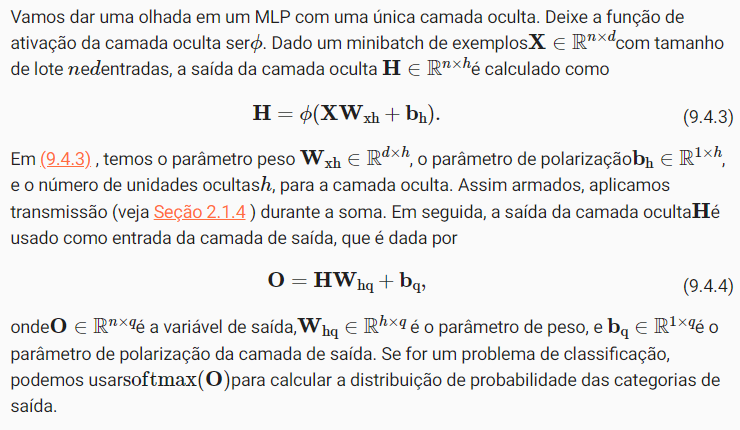

# 9.4.2. Redes Neurais Recorrentes com Estados Ocultos

As coisas são completamente diferentes quando temos estados ocultos. Vamos olhar a estrutura com mais detalhes.

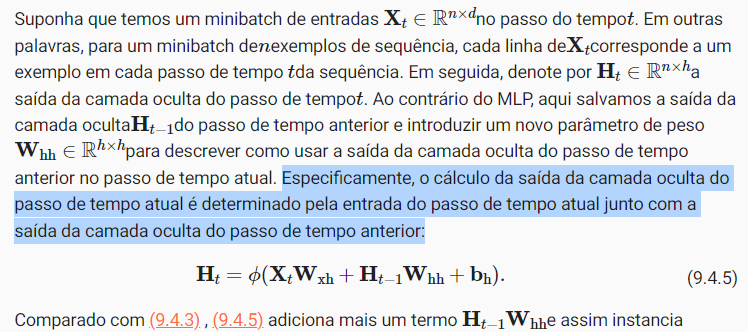

A partir da relação entre as saídas da camada oculta Ht e H(t-1) de passos de tempo adjacentes, sabemos que essas variáveis capturaram e retiveram as informações históricas da sequência até seu passo de tempo atual, assim como o estado ou a memória do passo de tempo atual da rede neural. 

__Portanto, essa saída de camada oculta é chamada de estado oculto. Como o estado oculto usa a mesma definição do passo de tempo anterior no passo de tempo atual, o cálculo de (9.4.5) é recorrente.__

__Portanto, como dissemos, redes neurais com estados ocultos com base em computação recorrente são chamadas de redes neurais recorrentes. 
Camadas que realizam o cálculo de (9.4.5) em RNNs são chamadas de camadas recorrentes.__

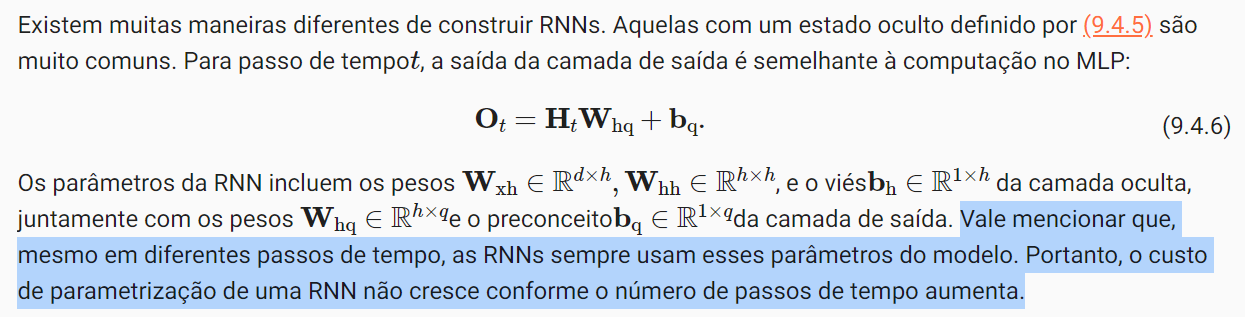

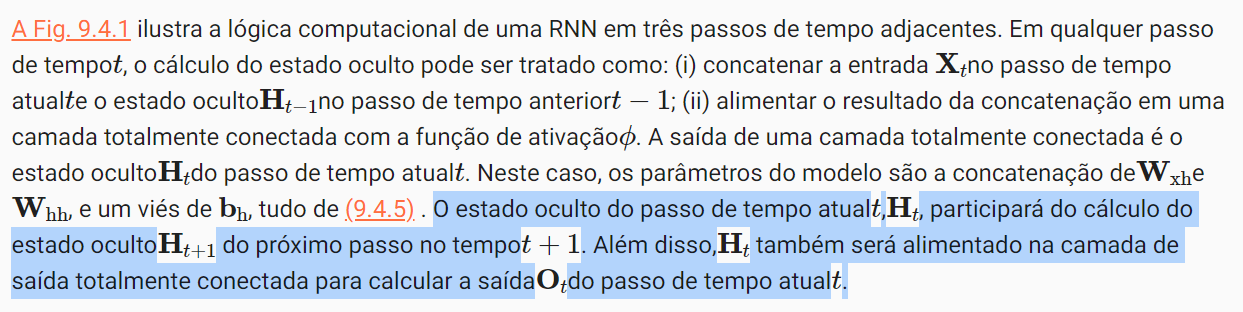

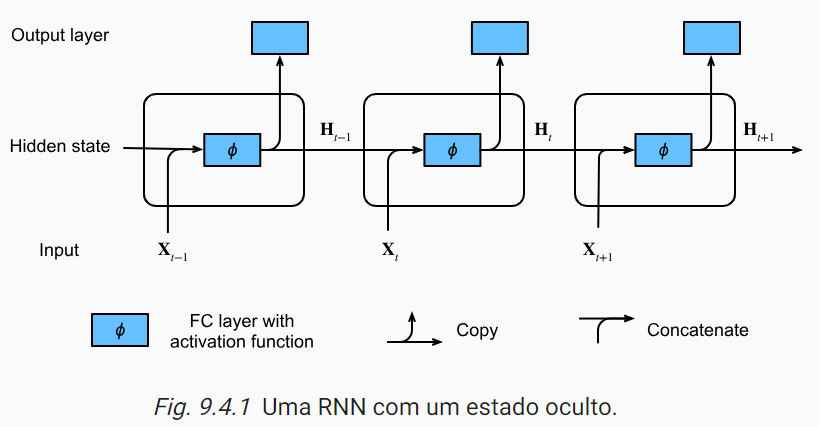

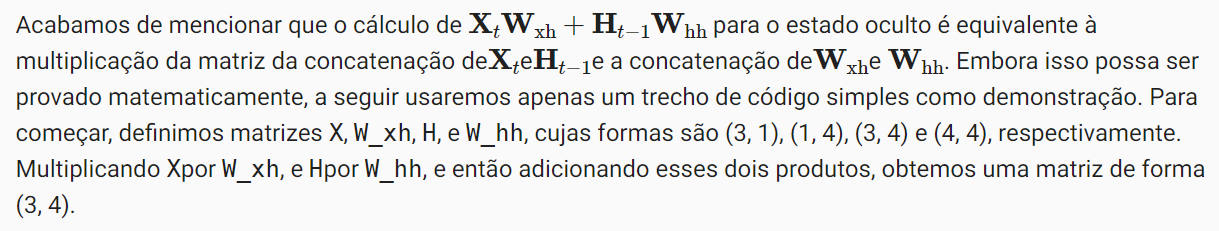

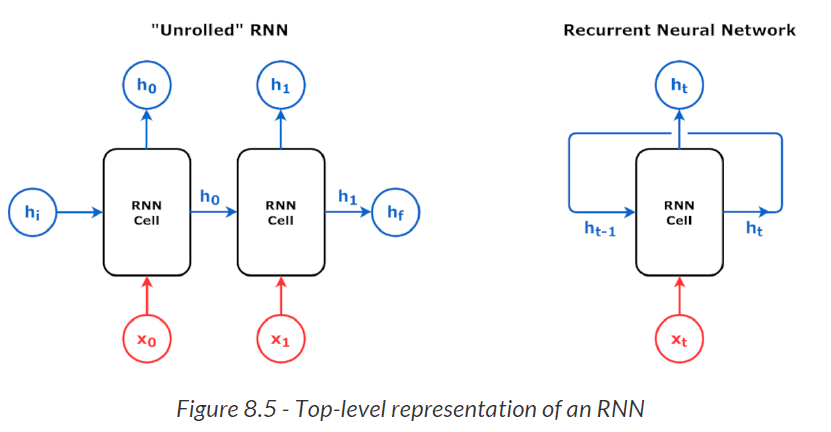

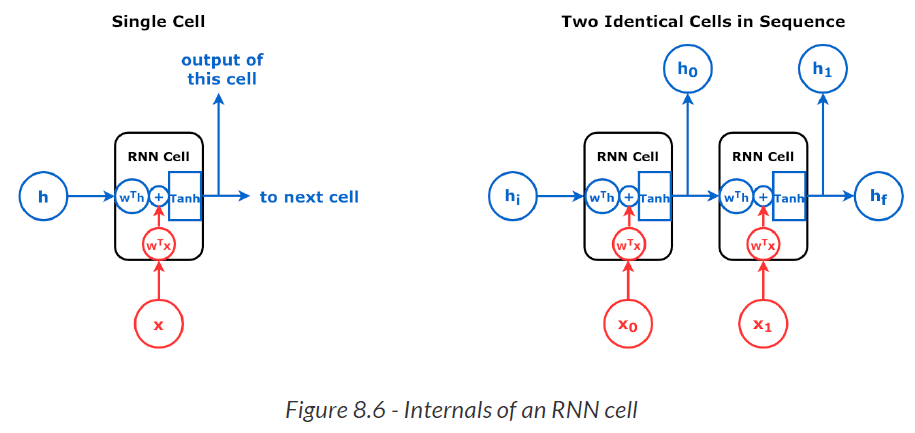

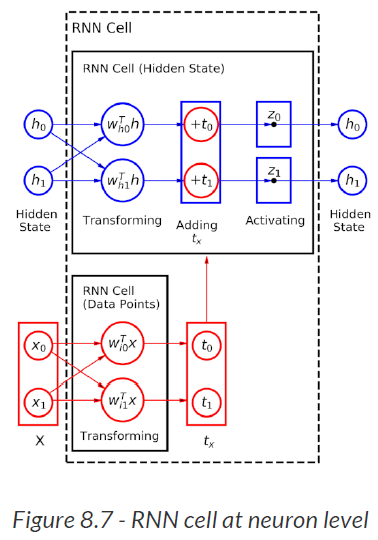

In [3]:
X, W_xh = torch.randn(3, 1), torch.randn(1, 4)    # produto resulta em 3x4
H, W_hh = torch.randn(3, 4), torch.randn(4, 4)    # produto resulta em 3x4
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[-0.2411, -0.3757,  1.7912, -1.1745],
        [ 2.4212, -0.3237,  3.6120, -0.8606],
        [ 2.8649,  2.2818, -0.3499,  0.9364]])

In [4]:
torch.matmul(X, W_xh)

tensor([[ 0.2132, -0.6728,  0.3812, -0.4293],
        [ 0.2925, -0.9229,  0.5228, -0.5889],
        [-0.2098,  0.6620, -0.3750,  0.4224]])

In [5]:
torch.matmul(H, W_hh)

tensor([[-0.4544,  0.2972,  1.4101, -0.7451],
        [ 2.1288,  0.5992,  3.0892, -0.2718],
        [ 3.0747,  1.6198,  0.0251,  0.5140]])

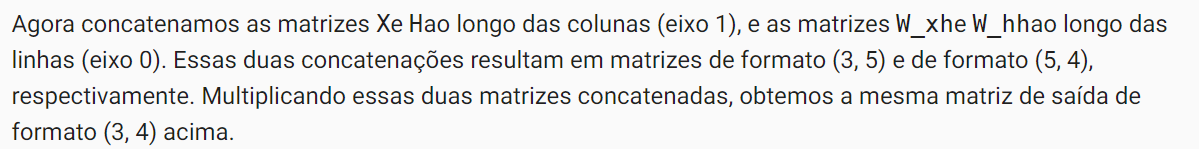

In [6]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))  #  multi(3x5,5x4) = 3x4

tensor([[-0.2411, -0.3757,  1.7912, -1.1745],
        [ 2.4212, -0.3237,  3.6120, -0.8606],
        [ 2.8649,  2.2818, -0.3499,  0.9364]])

In [8]:
torch.cat((X, H), 1)     # 3x5

tensor([[ 0.5440, -0.6375,  0.6933,  1.9045,  0.0564],
        [ 0.7462, -1.2388, -0.2449,  1.9857, -0.4664],
        [-0.5353, -2.0483, -0.5680,  0.2175,  0.2256]])

In [9]:
torch.cat((W_xh, W_hh), 0)    # 5x4

tensor([[ 0.3919, -1.2367,  0.7006, -0.7892],
        [-1.1094, -0.7472,  0.3149,  0.0130],
        [-1.6700, -0.0491, -1.1772, -0.7979],
        [ 0.0177, -0.0867,  1.3116, -0.1111],
        [-0.6654,  0.3564, -1.2580,  0.4942]])

# 9.4.3. Modelos de linguagem de nível de caractere baseados em RNN

Lembre-se de que para modelagem de linguagem na Seção 9.3 , pretendemos prever o próximo token com base nos tokens atuais e passados; assim, deslocamos a sequência original em um token como alvos (rótulos). 

- Ssequence of the text be “machine”.
- Input: "machin".
- tamanho fixo: 6 caracteres, assim, previsão para o próximo caractere: "achine".

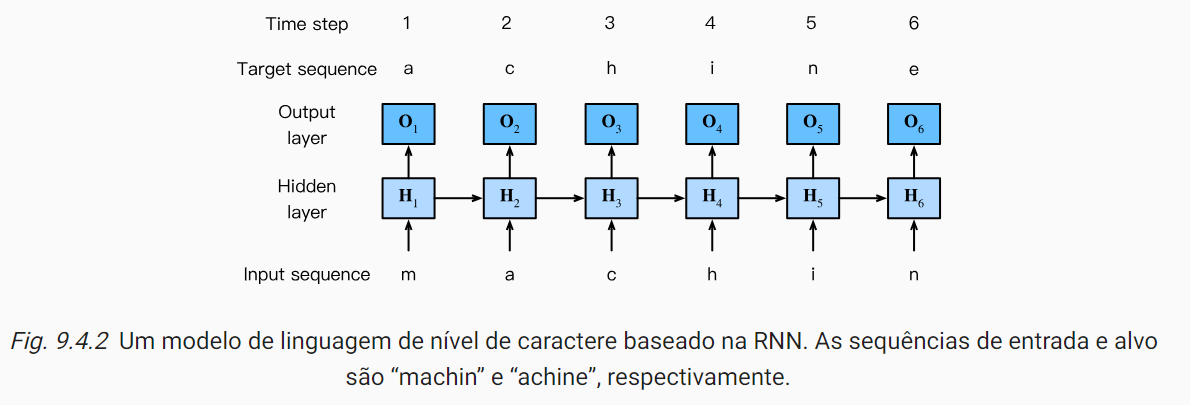

Durante o processo de treinamento, executamos uma operação softmax na saída da camada de saída para cada passo de tempo e, em seguida, usamos a perda de entropia cruzada para calcular o erro entre a saída do modelo e o alvo.

Na prática, cada token é representado por um vetor tridimensional __d__ e usamos um tamanho de lote n>1.

Portanto, a entrada Xt no passo de tempo t será uma matriz __n__ x __d__

# 9.4.4. Resumo

- Uma rede neural que usa computação recorrente para __estados ocultos__ é chamada de rede neural recorrente (RNN). 
- O estado oculto de uma RNN pode capturar informações históricas da sequência até o passo de tempo atual. 
- Com a computação recorrente __(que volta a utilizar sempre a mesma quantidade de parâmetros, conforme estes são autalizados a cada passo de tempo)__, o número de parâmetros do modelo RNN não cresce conforme o número de passos de tempo aumenta. 
- Quanto às aplicações, uma RNN pode ser usada para criar modelos de linguagem em nível de caractere.

# 9.4.5. Exercícios

# Ex. 1 - Se usarmos uma RNN para prever o próximo caractere em uma sequência de texto, qual é a dimensão necessária para qualquer saída?

Se a previsão é de 1 caractere, a dimensão necessária para a saída também é de 1 caractere.

# Outras respostas:

https://pandalab.me/archives/recurrent_neural_networks